In [77]:
import pandas as pd
import seaborn as sns
from sklearn.utils import column_or_1d
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import numpy as np
import warnings

from keras.models import Sequential
from keras.layers import Dense

In [92]:
X_test = pd.read_csv('./Data/X_test_clean.csv')
X_train = pd.read_csv('./Data/X_train_clean.csv')
y_train = pd.read_csv('./Data/y_train_clean.csv')
test = pd.read_csv('./Data/test.csv')


In [103]:
X_train.head()

,exter_qual_TA kitchen_qual_TA,exter_qual_TA gr_liv_area,exter_qual_TA garage_cars,exter_qual_TA total_bsmt_sf,exter_qual_TA garage_area,exter_qual_TA 1st_flr_sf,exter_qual_TA bsmt_qual_Ex,exter_qual_TA kitchen_qual_Ex,exter_qual_TA full_bath,exter_qual_TA foundation_PConc,...,overall_qual_10,overall_cond_1,overall_cond_2,overall_cond_3,overall_cond_4,overall_cond_5,overall_cond_6,overall_cond_7,overall_cond_8,overall_cond_9
0,0.0,1928.0,1.0,1020.0,440.0,908.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,1967.0,2.0,1967.0,580.0,1967.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1394.0,2.0,1394.0,514.0,1394.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [95]:
y_train_array = column_or_1d(y_train)

In [96]:
kf = KFold(n_splits=10, shuffle=True)

In [104]:
#l_alphas = np.logspace(-4, -.5, 30) #Alpha 0.31622776601683794
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #Thanks stack overflow
l_alphas = np.logspace(2.7, 3.05, 100)
lasso_model = LassoCV(alphas=l_alphas, cv=kf)
lasso_model = lasso_model.fit(X_train_sc, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

In [105]:
optimus_alpha = lasso_model.alpha_
optimus_alpha

0.31622776601683794

In [106]:
cleo = lasso_model.predict(X_test_sc)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Lasso_sc7.csv',index=False)

df_test = pd.read_csv('./Data/Final_Lasso_sc7.csv')
df_test.head()

,Id,SalePrice
0,2658,163964.333550
1,2718,161581.363480
2,2414,215323.088504
3,1989,97065.376368
4,625,176658.530825


This was a score of 36583

In [86]:
r_alphas = np.logspace(2.8, 2.95, 100)
ridge_model = RidgeCV(alphas=r_alphas, cv=kf)
ridge_model = ridge_model.fit(X_train_sc, y_train_array)

In [87]:
optimus_alpha_r = ridge_model.alpha_
optimus_alpha_r

891.2509381337459

In [88]:
cleo = ridge_model.predict(X_test_sc)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Ridge_Sc3.csv',index=False)

df_test = pd.read_csv('./Data/Final_Ridge_Sc3.csv')
df_test.head()

,Id,SalePrice
0,2658,119975.952579
1,2718,162087.596678
2,2414,223223.896001
3,1989,108179.672539
4,625,183840.023892


This scored 37111 Worse than Lasso

In [89]:
knn = KNeighborsClassifier(n_neighbors=1, p = 4)
knn.fit(X_train_sc, y_train)


/home/steven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=4,
           weights='uniform')

In [90]:
cleo = knn.predict(X_test_sc)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_KNN1_Sc.csv',index=False)

df_test = pd.read_csv('./Data/Final_KNN1_Sc.csv')
df_test.head()

These values don't look right. Not sending it in.

In [58]:
X_train_c = sm.add_constant(X_train[features])
X_test_c = sm.add_constant(X_test[features])

results = sm.GLM(y_train_array,
                 X_train_c,
                 family = sm.families.Gamma())
gamma_results =results.fit()
#results.summary()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2051
Model:                            GLM   Df Residuals:                     2037
Model Family:                   Gamma   Df Model:                           13
Link Function:          inverse_power   Scale:                        0.037426
Method:                          IRLS   Log-Likelihood:                -26137.
Date:                Tue, 21 Aug 2018   Deviance:                       217.33
Time:                        23:40:50   Pearson chi2:                     76.2
No. Iterations:                     8   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.809e-06   1.37e-07     71.640      0.000    9.54e-06    1.01e-05
exter_qual_TA     4.168e-07   7.87

/home/steven/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [59]:
cleo = gamma_results.predict(X_test_c)
cleo

0      158579.844710
1      186434.860641
2      173152.532394
3      140200.598399
4      151683.067903
5      119253.547175
6      125012.728027
7      146175.673652
8      206636.934581
9      145621.940079
10     186691.101599
11     133421.825209
12     152113.887881
13     341340.920348
14     135205.067222
15     122726.389551
16     145190.363581
17     127945.277430
18     165197.843097
19     171244.188692
20     134592.495683
21     131371.655663
22     230267.355956
23     134928.350856
24     183232.420659
25     120151.999519
26     137913.916319
27     145800.629847
28     154231.958260
29     109310.904649
           ...      
849    125686.029835
850    153982.297269
851    160547.817809
852    149080.799434
853    129037.738759
854    134593.651329
855    151752.858862
856    142013.748481
857    174310.839842
858    121760.458430
859    185799.559991
860    110028.395009
861    349486.536994
862    124759.927708
863    134215.666272
864    162502.586742
865    153273

In [60]:
df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})

df_cleo.to_csv('./Data/Final_Gamma5.csv',index=False)

df_test = pd.read_csv('./Data/Final_Gamma5.csv')
df_test.head()

,Id,SalePrice
0,2658,158579.844710
1,2718,186434.860641
2,2414,173152.532394
3,1989,140200.598399
4,625,151683.067903


In [120]:
enet_alphas = np.logspace(-1, 0.03, 100)
enet_ratio = 0.9
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=kf)
enet_model = enet_model.fit(X_train_sc, y_train_array)

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/steven/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

In [121]:
optimus_alpha_e = enet_model.alpha_
optimus_alpha_e
enet_model.score(X_train_sc,y_train_array)

0.9508041460691145

In [71]:
enet_model.score(X_train_sc,y_train_array)

0.9401362373388237

In [72]:
cleo = enet_model.predict(X_test_sc)

df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})
df_cleo.to_csv('./Data/Final_ENet_sc2.csv',index=False)

df_test = pd.read_csv('./Data/Final_ENet_sc2.csv')
df_test.head()

In [74]:
#enet_model = 0
enet_alphas = np.logspace(-2, 0.03, 100)
enet_ratio = 0.1
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=20)
enet_model = enet_model.fit(X_train_sc, y_train_array)

In [75]:
optimus_alpha_e = enet_model.alpha_
optimus_alpha_e
enet_model.score(X_train_sc,y_train_array)

0.9347995367545087

In [76]:
cleo = enet_model.predict(X_test_sc)

In [42]:
df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo})
df_cleo.to_csv('./Data/Final_ENet_sc2.csv',index=False)

df_test = pd.read_csv('./Data/Final_ENet_sc2.csv')
df_test.head()

,Id,SalePrice
0,2658,[168252.8689776]
1,2718,[202237.76538227]
2,2414,[182919.3377106]
3,1989,[143236.93141398]
4,625,[169256.7978133]


In [95]:
model = Sequential()

In [96]:
model.add(Dense(units=64, activation='relu', input_dim=603))
model.add(Dense(units=1, activation='softmax'))

In [99]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

In [100]:
model.fit(X_train_sc, y_train, epochs=5, batch_size=32)

Epoch 1/5
2051/2051 [==============================] - 0s 178us/step - loss: 39209762010.1804 - acc: 0.0000e+00
Epoch 2/5
2051/2051 [==============================] - 0s 47us/step - loss: 39209762093.0590 - acc: 0.0000e+00
Epoch 3/5
2051/2051 [==============================] - 0s 49us/step - loss: 39209761965.2462 - acc: 0.0000e+00
Epoch 4/5
2051/2051 [==============================] - 0s 50us/step - loss: 39209762111.0327 - acc: 0.0000e+00
Epoch 5/5
2051/2051 [==============================] - 0s 48us/step - loss: 39209761610.7655 - acc: 0.0000e+00


In [101]:
cleo = model.predict(X_test_sc)

Let's not talk about this

Ok, models are not really improving the score. Going to try and do some feature modeling manually

In [6]:
train = pd.concat([X_train,y_train], axis=1)

In [7]:
train_cor = train.corr()

corr_values_h = train_cor.nlargest(13,'saleprice')

corr_values_h

In [10]:
corr_values_l =train_cor.nsmallest(10,'saleprice')

In [11]:
corr_values_l

,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,...,overall_cond_1,overall_cond_2,overall_cond_3,overall_cond_4,overall_cond_5,overall_cond_6,overall_cond_7,overall_cond_8,overall_cond_9,saleprice
exter_qual_TA,-0.105245,-0.051067,-0.269285,-0.158101,0.053466,-0.241693,-0.381783,-0.318021,-0.169008,0.038777,...,-0.009779,0.025002,0.059532,0.106934,-0.439984,0.294785,0.194486,0.085815,-0.064558,-0.600362
kitchen_qual_TA,-0.122740,-0.083348,-0.226351,-0.138001,0.038319,-0.205697,-0.331049,-0.293941,-0.162780,0.032475,...,0.021180,-0.001136,0.083842,0.098126,-0.301861,0.252011,0.095687,0.001989,-0.080991,-0.540860
bsmt_qual_TA,-0.057991,-0.078599,-0.180038,-0.154732,0.067550,-0.064341,-0.197840,-0.230773,-0.141841,0.101218,...,0.006025,0.007383,0.067352,0.085247,-0.475286,0.268925,0.201523,0.142454,0.070505,-0.456979
garage_finish_Unf,-0.162705,-0.059830,-0.226758,-0.193555,0.028316,-0.117849,-0.304721,-0.272861,-0.082961,0.040261,...,-0.014714,0.009464,0.057416,0.098269,-0.328844,0.125557,0.158791,0.147273,0.033501,-0.432220
mas_vnr_type_None,-0.168896,-0.089955,-0.680675,-0.270291,0.016237,-0.086812,-0.357236,-0.332660,-0.012238,0.089296,...,0.036557,0.044795,0.062972,0.084371,-0.251879,0.055526,0.134069,0.114799,0.048587,-0.424088
garage_type_Detchd,-0.247760,-0.165535,-0.175540,-0.215520,-0.028344,-0.071449,-0.302042,-0.332639,0.006500,0.078291,...,-0.001141,0.008876,0.041584,0.102111,-0.287409,0.074698,0.162269,0.136447,0.041556,-0.370344
overall_qual_5,-0.013872,-0.028587,-0.215567,-0.047246,0.081895,-0.146610,-0.163678,-0.152312,-0.211459,0.007773,...,-0.002427,-0.013089,0.028619,0.010741,-0.239664,0.162254,0.135349,0.041785,-0.027396,-0.361012
foundation_CBlock,0.010888,0.067097,-0.078981,0.037700,0.168999,-0.218410,-0.115650,-0.092968,-0.253668,-0.014056,...,-0.015291,-0.009593,0.040210,0.073684,-0.361935,0.280954,0.129671,0.034242,0.023402,-0.355535
heating_qc_TA,-0.057614,-0.003966,-0.119550,-0.046509,0.090451,-0.157865,-0.170561,-0.112825,-0.153322,0.039202,...,-0.003997,0.005039,0.081318,0.092366,-0.179871,0.161914,0.045742,-0.051583,-0.040375,-0.343542
year_remod/add_1950,-0.123355,-0.084864,-0.176797,-0.215026,-0.081967,0.002903,-0.247434,-0.243005,0.044988,0.095064,...,0.086162,0.063751,0.137633,0.171471,-0.237094,0.091137,0.097456,-0.007069,-0.044007,-0.307730


In [12]:
corr_l_lst = corr_values_l.index.get_values()

In [13]:
corr_l_lst[0:2]

array(['exter_qual_TA', 'kitchen_qual_TA'], dtype=object)

In [14]:
corr_h_lst = corr_values_h.index.get_values()

In [15]:
corr_h_lst[1:12]

array(['gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'bsmt_qual_Ex', 'kitchen_qual_Ex', 'full_bath',
       'foundation_PConc', 'totrms_abvgrd', 'mas_vnr_area'], dtype=object)

In [16]:

features = list(corr_l_lst[0:2]) + list(corr_h_lst[1:12])


In [17]:
features

['exter_qual_TA',
 'kitchen_qual_TA',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'bsmt_qual_Ex',
 'kitchen_qual_Ex',
 'full_bath',
 'foundation_PConc',
 'totrms_abvgrd',
 'mas_vnr_area']

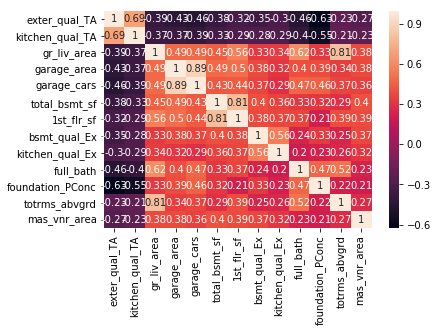

In [18]:
sns.heatmap(train[features].corr(),annot=True)

In [50]:
X_train_f = X_train[corr_h_lst[1:12]]

In [51]:
X_train_f.head()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,bsmt_qual_Ex,kitchen_qual_Ex,full_bath,foundation_PConc,totrms_abvgrd,mas_vnr_area
0,1479,475.0,2.0,725.0,725,0,0,2,0,6,289.0
1,2122,559.0,2.0,913.0,913,0,0,2,1,8,132.0
2,1057,246.0,1.0,1057.0,1057,0,0,1,0,5,0.0
3,1444,400.0,2.0,384.0,744,0,0,2,1,7,0.0
4,1445,484.0,2.0,676.0,831,0,0,2,1,6,0.0


In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train_f,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
X_test[features]

,exter_qual_TA,kitchen_qual_TA,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,bsmt_qual_Ex,kitchen_qual_Ex,full_bath,foundation_PConc,totrms_abvgrd,mas_vnr_area
0,1,0,1928,440.0,1.0,1020.0,908,0,0,2,0,9,0.0
1,1,1,1967,580.0,2.0,1967.0,1967,0,0,2,0,10,0.0
2,0,0,1496,426.0,2.0,654.0,664,0,0,2,1,7,0.0
3,0,1,968,480.0,2.0,968.0,968,0,0,1,0,5,0.0
4,1,1,1394,514.0,2.0,1394.0,1394,0,0,1,0,6,247.0
5,1,1,1092,286.0,1.0,546.0,546,0,0,1,0,5,0.0
6,1,1,1093,308.0,1.0,869.0,1093,0,0,1,0,5,0.0
7,1,0,1268,252.0,1.0,1268.0,1268,0,0,1,0,5,0.0
8,0,0,1680,588.0,2.0,840.0,840,0,0,2,1,3,0.0
9,1,1,1279,473.0,2.0,1196.0,1279,0,0,2,0,6,0.0


In [55]:
cleo = lr.predict(X_test[corr_h_lst[1:12]])

In [56]:
#cleo = list(cleo)
cleo2 = np.concatenate(cleo)
cleo2

array([161913.53091605, 209356.38354028, 172371.3608732 , 130404.20009675,
       175247.65754564, 104755.87028849, 117038.31829267, 137309.19811486,
       207376.1767643 , 158137.0244142 , 183905.43848922, 132761.8498216 ,
       165472.94855432, 350978.06420215, 140711.57255907, 128308.6824419 ,
       157881.49575096, 122260.42212815, 194247.42434269, 159536.74518234,
       115693.22684735, 127522.75149179, 220173.38050498, 135958.46640065,
       176300.73271749, 104066.08762206, 150267.60159718, 185353.52524357,
       162404.58834847,  58369.16262267, 115524.75238124, 139487.34077598,
       259546.88474079, 147904.23733239, 214944.41374827, 174833.02536405,
       163202.73636715, 104982.18051159, 101373.29855405, 199395.51378872,
       172365.01962205, 192385.18112657, 151170.61909646, 135970.4191007 ,
       198898.42842641,  95334.55335196, 211954.78424628, 104253.49226843,
       112994.5171382 , 118537.30565457, 118597.55117497, 195728.4458455 ,
       241547.40439536, 1

In [57]:
df_cleo = pd.DataFrame({'Id': test.Id,'SalePrice':cleo2})
df_cleo.to_csv('./Data/Final_Linear2.csv',index=False)

df_test = pd.read_csv('./Data/Final_Linear2.csv')
df_test.head()

,Id,SalePrice
0,2658,161913.530916
1,2718,209356.383540
2,2414,172371.360873
3,1989,130404.200097
4,625,175247.657546


In [119]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 1 columns):
saleprice    2051 non-null float64
dtypes: float64(1)
memory usage: 16.1 KB


In [115]:
import xgboost as xgb
# read in data
target = y_train.saleprice
train = X_train_sc
#test = pd.read_csv("test.csv")
#test = test.drop(['ID'],axis=1)

xgtrain = xgb.DMatrix(X_train.get_values(), y_train.saleprice.values)
xgtest = xgb.DMatrix(test.values)

param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, xgtrain, num_round)
# make prediction
preds = bst.predict(xgtest)


ValueError: could not convert string to float: 'WD '

In [ ]:
cleo